In [1]:
import matplotlib.pyplot as plt
import platform
from matplotlib import font_manager, rc

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    fontname=font_manager.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=fontname)
else:
    print("시스템 정보를 찾을 수 없습니다.")

# TextBlob

In [2]:
!pip install textblob

  Using cached textblob-0.17.1-py2.py3-none-any.whl (636 kB)


In [51]:
import pandas as pd
from textblob import TextBlob
from textblob.classifiers import NaiveBayesClassifier

In [52]:
train_data=pd.read_csv('레이블링학습데이터_2만6천.txt')
train_data=train_data.drop(columns=['Unnamed: 0'],axis=1)

In [53]:
train_data = train_data.reset_index(drop=True)
train_data

,Sentence,PN
0,여름 다지나고 나오면 뭐함어이가 없네,1.0
1,애들이 겁도없이 끝까지 긴장감이 있네 걍 볼만합니다,0.0
2,최근에 나온 상어 영화중에서는 최고인듯,0.0
3,상어는 여전히 무섭군 + 이라서 봤다,0.0
4,편보다 훨 재미있음,0.0
...,...,...
26922,재밌었어요,1.0
26923,"""이 영화를 본후.. 조난실의 """"개여울""""은 내 폰의 벨소리가 되었다.. 몇년이 ...",1.0
26924,",.,.,.,.,.",0.0
26925,이런식으로 만날 거라곤 상상조차 하지 못함.. 매우 디테일하고 감성이 섬세해서 여성...,1.0


In [54]:
train_data.isna().sum()

Sentence    1
PN          0
dtype: int64

In [55]:
train_data = train_data.dropna()

In [56]:
train_data.groupby(['PN']).count()

,Sentence
PN,
0.0,15222
1.0,11702
10.0,1
11.0,1


In [57]:
train_data = train_data.astype({'PN':'int64'})
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26926 entries, 0 to 26926
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Sentence  26926 non-null  object
 1   PN        26926 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 631.1+ KB


In [58]:
train_data = train_data.replace(10,0)
train_data = train_data.replace(11,1)
train_data.groupby(['PN']).count()

,Sentence
PN,
0,15223
1,11703


In [59]:
train_data.isna().sum()

Sentence    0
PN          0
dtype: int64

In [60]:
test_data=pd.read_csv('레이블링테스트데이터_2만6천.txt')
test_data=test_data.drop(columns=['Unnamed: 0'],axis=1)
test_data = test_data.reset_index(drop=True)
test_data

,Sentence,PN
0,"이 좋은 시나리오를 갖고, 얘들은 도대체 뭘 만들어 논거야~!!!",0.0
1,장마철이 누군가에겐 그토록 소중한것임을...,1.0
2,동심으로 돌아간듯한기분! 노래도 짱짱!,1.0
3,카호의 사랑스러운 모습이 너무도 눈부시다. 이거 보고 몇 일간 얼이 빠져서 생활했던...,1.0
4,왕조현 때문에 봤지만 스토리는 좀 그렇다,0.0
...,...,...
26923,오랜만에 평점 로긴했네ㅋㅋ 킹왕짱 쌈뽕한 영화를 만났습니다 강렬하게 육쾌함,1.0
26924,의지 박약들이나 하는거다 탈영은 일단 주인공 김대희 닮았고 이등병 찐따 OOOO,0.0
26925,그림도 좋고 완성도도 높았지만... 보는 내내 불안하게 만든다,0.0
26926,절대 봐서는 안 될 영화.. 재미도 없고 기분만 잡치고.. 한 세트장에서 다 해먹네,0.0


In [61]:
test_data.isna().sum()

Sentence    1
PN          0
dtype: int64

In [62]:
test_data = test_data.dropna()

In [63]:
test_data.groupby(['PN']).count()

,Sentence
PN,
0.0,13370
1.0,13557


In [64]:
test_data = test_data.astype({'PN':'int64'})
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26927 entries, 0 to 26927
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Sentence  26927 non-null  object
 1   PN        26927 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 631.1+ KB


In [65]:
test_data.isna().sum()

Sentence    0
PN          0
dtype: int64

In [66]:
def tup_che(df_t):
    tr_te=[]
    for i in range(len(df_t)):
        tr_te.append((df_t.iloc[i,0],df_t.iloc[i,-1]))
    return tr_te

In [67]:
# del train_data['Sentence'], test_data['Sentence']

train = tup_che(train_data)
test = tup_che(test_data)

train[:5]

[('여름 다지나고 나오면 뭐함어이가 없네', 1),
 ('애들이 겁도없이 끝까지 긴장감이 있네 걍 볼만합니다', 0),
 ('최근에 나온 상어 영화중에서는 최고인듯', 0),
 ('상어는 여전히 무섭군  + 이라서 봤다', 0),
 ('편보다 훨 재미있음', 0)]

In [68]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /Users/wellekim/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
pos_neg = NaiveBayesClassifier(train)
test_acc = pos_neg.accuracy(test)

print(f'정확도: {test_acc}')

# ML

## 데이터 전처리

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

train = pd.read_csv('Main_actor_train.csv').drop(columns='Unnamed: 0',axis=1)
# LB_test = pd.read_csv('레이블인코딩_test.csv').drop(columns='Unnamed: 0',axis=1)

In [6]:
train.head()

,title,distributor,genre,director,box_off_num,main_actor
0,개들의 전쟁,롯데엔터테인먼트,액션,조병옥,23398,김무열
1,내부자들,쇼박스,느와르,우민호,7072501,이병헌
2,은밀하게 위대하게,쇼박스,액션,장철수,6959083,김수현
3,나는 공무원이다,NEW,코미디,구자홍,217866,윤제문
4,불량남녀,쇼박스,코미디,신근호,483387,임창정


In [7]:
train = train.drop(columns=['title','director'],axis=1)
train = train[['distributor','genre','main_actor','box_off_num']]
train

,distributor,genre,main_actor,box_off_num
0,롯데엔터테인먼트,액션,김무열,23398
1,쇼박스,느와르,이병헌,7072501
2,쇼박스,액션,김수현,6959083
3,NEW,코미디,윤제문,217866
4,쇼박스,코미디,임창정,483387
...,...,...,...,...
595,NEW,드라마,김윤석,1475091
596,쇼박스,드라마,한석규,1716438
597,마운틴픽처스,공포,김다현,2475
598,CJ,느와르,손현주,2192525


In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   distributor  600 non-null    object
 1   genre        600 non-null    object
 2   main_actor   560 non-null    object
 3   box_off_num  600 non-null    int64 
dtypes: int64(1), object(3)
memory usage: 18.9+ KB


In [9]:
train.isna().sum()

distributor     0
genre           0
main_actor     40
box_off_num     0
dtype: int64

In [10]:
train = train.dropna().reset_index(drop=True)
train

,distributor,genre,main_actor,box_off_num
0,롯데엔터테인먼트,액션,김무열,23398
1,쇼박스,느와르,이병헌,7072501
2,쇼박스,액션,김수현,6959083
3,NEW,코미디,윤제문,217866
4,쇼박스,코미디,임창정,483387
...,...,...,...,...
555,마운틴픽처스,코미디,손병호,1958
556,NEW,드라마,김윤석,1475091
557,쇼박스,드라마,한석규,1716438
558,마운틴픽처스,공포,김다현,2475


In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 560 entries, 0 to 559
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   distributor  560 non-null    object
 1   genre        560 non-null    object
 2   main_actor   560 non-null    object
 3   box_off_num  560 non-null    int64 
dtypes: int64(1), object(3)
memory usage: 17.6+ KB


In [12]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse=False)

train_dis = ohe.fit_transform(train[['distributor']])
distributor = pd.DataFrame(train_dis, columns=['distributor' + col for col in ohe.categories_[0]])
distributor
# train = pd.concat([train.drop(columns=['distributor']),
#                    pd.DataFrame(train_dis, columns=['distributor' + col for col in ohe.categories_[0]])],axis=1)
# train

,distributorBoXoo엔터테인먼트,distributorCJ,distributorJK필름,distributorKBS미디어,distributorKT,distributorKTG상상마당,distributorM2픽처스,distributorNEW,distributorOAL올,distributorSBS콘텐츠허브,...,distributor프로젝트엠피,distributor프리비젼엔터테인먼트,distributor피터팬픽쳐스,distributor필라멘트픽쳐스,distributor필름라인,distributor하준사,distributor한국YWCA연합회,distributor홀리가든,distributor화앤담이엔티,distributor휘엔터테인먼트
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
556,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
557,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
558,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
distributor_corr = distributor.corr(method='pearson')
distributor_corr

,distributorBoXoo엔터테인먼트,distributorCJ,distributorJK필름,distributorKBS미디어,distributorKT,distributorKTG상상마당,distributorM2픽처스,distributorNEW,distributorOAL올,distributorSBS콘텐츠허브,...,distributor프로젝트엠피,distributor프리비젼엔터테인먼트,distributor피터팬픽쳐스,distributor필라멘트픽쳐스,distributor필름라인,distributor하준사,distributor한국YWCA연합회,distributor홀리가든,distributor화앤담이엔티,distributor휘엔터테인먼트
distributorBoXoo엔터테인먼트,1.000000,-0.035713,-0.004402,-0.004402,-0.004402,-0.011709,-0.004402,-0.026459,-0.004402,-0.006230,...,-0.004402,-0.004402,-0.004402,-0.009878,-0.004402,-0.004402,-0.004402,-0.008827,-0.006230,-0.004402
distributorCJ,-0.035713,1.000000,-0.014514,-0.014514,-0.014514,-0.038609,-0.014514,-0.087248,-0.014514,-0.020545,...,-0.014514,-0.014514,-0.014514,-0.032572,-0.014514,-0.014514,-0.014514,-0.029107,-0.020545,-0.014514
distributorJK필름,-0.004402,-0.014514,1.000000,-0.001789,-0.001789,-0.004759,-0.001789,-0.010753,-0.001789,-0.002532,...,-0.001789,-0.001789,-0.001789,-0.004015,-0.001789,-0.001789,-0.001789,-0.003587,-0.002532,-0.001789
distributorKBS미디어,-0.004402,-0.014514,-0.001789,1.000000,-0.001789,-0.004759,-0.001789,-0.010753,-0.001789,-0.002532,...,-0.001789,-0.001789,-0.001789,-0.004015,-0.001789,-0.001789,-0.001789,-0.003587,-0.002532,-0.001789
distributorKT,-0.004402,-0.014514,-0.001789,-0.001789,1.000000,-0.004759,-0.001789,-0.010753,-0.001789,-0.002532,...,-0.001789,-0.001789,-0.001789,-0.004015,-0.001789,-0.001789,-0.001789,-0.003587,-0.002532,-0.001789
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
distributor하준사,-0.004402,-0.014514,-0.001789,-0.001789,-0.001789,-0.004759,-0.001789,-0.010753,-0.001789,-0.002532,...,-0.001789,-0.001789,-0.001789,-0.004015,-0.001789,1.000000,-0.001789,-0.003587,-0.002532,-0.001789
distributor한국YWCA연합회,-0.004402,-0.014514,-0.001789,-0.001789,-0.001789,-0.004759,-0.001789,-0.010753,-0.001789,-0.002532,...,-0.001789,-0.001789,-0.001789,-0.004015,-0.001789,-0.001789,1.000000,-0.003587,-0.002532,-0.001789
distributor홀리가든,-0.008827,-0.029107,-0.003587,-0.003587,-0.003587,-0.009543,-0.003587,-0.021564,-0.003587,-0.005078,...,-0.003587,-0.003587,-0.003587,-0.008051,-0.003587,-0.003587,-0.003587,1.000000,-0.005078,-0.003587
distributor화앤담이엔티,-0.006230,-0.020545,-0.002532,-0.002532,-0.002532,-0.006736,-0.002532,-0.015221,-0.002532,-0.003584,...,-0.002532,-0.002532,-0.002532,-0.005682,-0.002532,-0.002532,-0.002532,-0.005078,1.000000,-0.002532


/Users/wellekim/miniforge3/envs/test/lib/python3.8/site-packages/seaborn/utils.py:95: UserWarning: Glyph 50644 (\N{HANGUL SYLLABLE EN}) missing from current font.
  fig.canvas.draw()
/Users/wellekim/miniforge3/envs/test/lib/python3.8/site-packages/seaborn/utils.py:95: UserWarning: Glyph 53552 (\N{HANGUL SYLLABLE TEO}) missing from current font.
  fig.canvas.draw()
/Users/wellekim/miniforge3/envs/test/lib/python3.8/site-packages/seaborn/utils.py:95: UserWarning: Glyph 53580 (\N{HANGUL SYLLABLE TE}) missing from current font.
  fig.canvas.draw()
/Users/wellekim/miniforge3/envs/test/lib/python3.8/site-packages/seaborn/utils.py:95: UserWarning: Glyph 51064 (\N{HANGUL SYLLABLE IN}) missing from current font.
  fig.canvas.draw()
/Users/wellekim/miniforge3/envs/test/lib/python3.8/site-packages/seaborn/utils.py:95: UserWarning: Glyph 47676 (\N{HANGUL SYLLABLE MEON}) missing from current font.
  fig.canvas.draw()
/Users/wellekim/miniforge3/envs/test/lib/python3.8/site-packages/seaborn/utils.py:

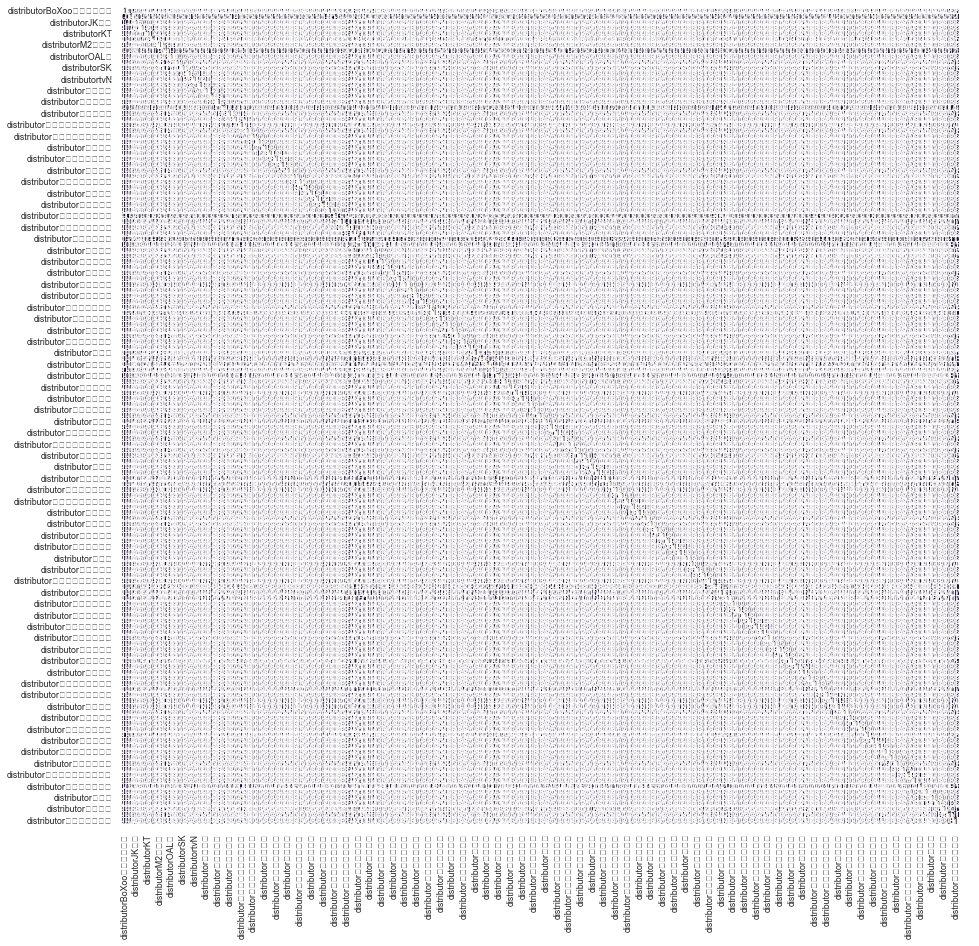

In [14]:
plt.figure(figsize=(15, 15))
sns.set(font_scale=0.8)
sns.heatmap(distributor_corr, annot=True, cbar=False);
plt.show()

In [15]:
train = pd.concat([train.drop(columns=['distributor']),
                   pd.DataFrame(train_dis, columns=['distributor' + col for col in ohe.categories_[0]])],axis=1)
train

,genre,main_actor,box_off_num,distributorBoXoo엔터테인먼트,distributorCJ,distributorJK필름,distributorKBS미디어,distributorKT,distributorKTG상상마당,distributorM2픽처스,...,distributor프로젝트엠피,distributor프리비젼엔터테인먼트,distributor피터팬픽쳐스,distributor필라멘트픽쳐스,distributor필름라인,distributor하준사,distributor한국YWCA연합회,distributor홀리가든,distributor화앤담이엔티,distributor휘엔터테인먼트
0,액션,김무열,23398,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,느와르,이병헌,7072501,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,액션,김수현,6959083,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,코미디,윤제문,217866,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,코미디,임창정,483387,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555,코미디,손병호,1958,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
556,드라마,김윤석,1475091,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
557,드라마,한석규,1716438,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
558,공포,김다현,2475,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
train_genre = ohe.fit_transform(train[['genre']])
genre = pd.DataFrame(train_genre, columns=['genre' + col for col in ohe.categories_[0]])
genre

,genreSF,genre공포,genre느와르,genre다큐멘터리,genre드라마,genre멜로/로맨스,genre뮤지컬,genre미스터리,genre서스펜스,genre애니메이션,genre액션,genre코미디
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
555,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
556,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
557,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
558,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
genre_corr = genre.corr(method='pearson')
genre_corr

,genreSF,genre공포,genre느와르,genre다큐멘터리,genre드라마,genre멜로/로맨스,genre뮤지컬,genre미스터리,genre서스펜스,genre애니메이션,genre액션,genre코미디
genreSF,1.000000,-0.039926,-0.030625,-0.065183,-0.110726,-0.058639,-0.014046,-0.026183,-0.008859,-0.027732,-0.031313,-0.047345
genre공포,-0.039926,1.000000,-0.055838,-0.118848,-0.201887,-0.106915,-0.025609,-0.047740,-0.016153,-0.050563,-0.057093,-0.086323
genre느와르,-0.030625,-0.055838,1.000000,-0.091161,-0.154856,-0.082009,-0.019643,-0.036619,-0.012390,-0.038784,-0.043793,-0.066214
genre다큐멘터리,-0.065183,-0.118848,-0.091161,1.000000,-0.329598,-0.174549,-0.041809,-0.077940,-0.026371,-0.082549,-0.093209,-0.140930
genre드라마,-0.110726,-0.201887,-0.154856,-0.329598,1.000000,-0.296507,-0.071021,-0.132396,-0.044797,-0.140226,-0.158334,-0.239398
genre멜로/로맨스,-0.058639,-0.106915,-0.082009,-0.174549,-0.296507,1.000000,-0.037612,-0.070115,-0.023724,-0.074261,-0.083851,-0.126781
genre뮤지컬,-0.014046,-0.025609,-0.019643,-0.041809,-0.071021,-0.037612,1.000000,-0.016794,-0.005682,-0.017788,-0.020085,-0.030367
genre미스터리,-0.026183,-0.047740,-0.036619,-0.077940,-0.132396,-0.070115,-0.016794,1.000000,-0.010593,-0.033159,-0.037441,-0.056610
genre서스펜스,-0.008859,-0.016153,-0.012390,-0.026371,-0.044797,-0.023724,-0.005682,-0.010593,1.000000,-0.011220,-0.012668,-0.019154
genre애니메이션,-0.027732,-0.050563,-0.038784,-0.082549,-0.140226,-0.074261,-0.017788,-0.033159,-0.011220,1.000000,-0.039655,-0.059958


/Users/wellekim/miniforge3/envs/test/lib/python3.8/site-packages/seaborn/utils.py:95: UserWarning: Glyph 44277 (\N{HANGUL SYLLABLE GONG}) missing from current font.
  fig.canvas.draw()
/Users/wellekim/miniforge3/envs/test/lib/python3.8/site-packages/seaborn/utils.py:95: UserWarning: Glyph 54252 (\N{HANGUL SYLLABLE PO}) missing from current font.
  fig.canvas.draw()
/Users/wellekim/miniforge3/envs/test/lib/python3.8/site-packages/seaborn/utils.py:95: UserWarning: Glyph 45712 (\N{HANGUL SYLLABLE NEU}) missing from current font.
  fig.canvas.draw()
/Users/wellekim/miniforge3/envs/test/lib/python3.8/site-packages/seaborn/utils.py:95: UserWarning: Glyph 50752 (\N{HANGUL SYLLABLE WA}) missing from current font.
  fig.canvas.draw()
/Users/wellekim/miniforge3/envs/test/lib/python3.8/site-packages/seaborn/utils.py:95: UserWarning: Glyph 47476 (\N{HANGUL SYLLABLE REU}) missing from current font.
  fig.canvas.draw()
/Users/wellekim/miniforge3/envs/test/lib/python3.8/site-packages/seaborn/utils.py

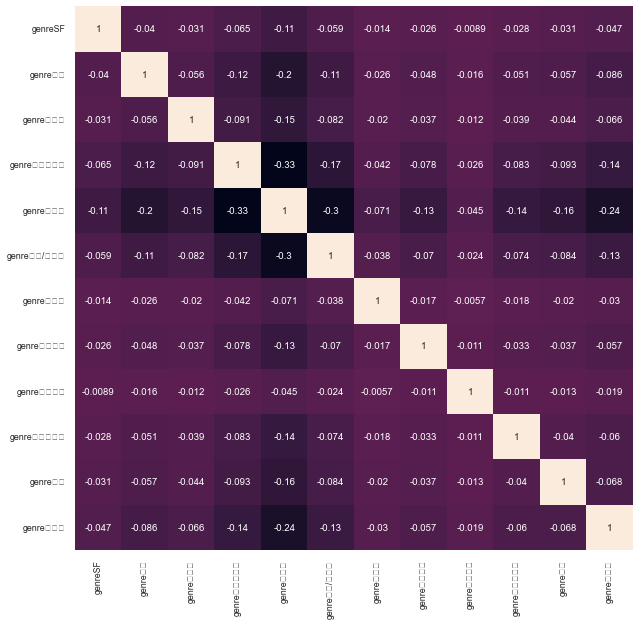

In [18]:
plt.figure(figsize=(10, 10))
sns.set(font_scale=0.8)
sns.heatmap(genre_corr, annot=True, cbar=False);
plt.show()

In [19]:
train = pd.concat([train.drop(columns=['genre']),
                   pd.DataFrame(train_genre, columns=['genre' + col for col in ohe.categories_[0]])],axis=1)
train

,main_actor,box_off_num,distributorBoXoo엔터테인먼트,distributorCJ,distributorJK필름,distributorKBS미디어,distributorKT,distributorKTG상상마당,distributorM2픽처스,distributorNEW,...,genre느와르,genre다큐멘터리,genre드라마,genre멜로/로맨스,genre뮤지컬,genre미스터리,genre서스펜스,genre애니메이션,genre액션,genre코미디
0,김무열,23398,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,이병헌,7072501,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,김수현,6959083,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,윤제문,217866,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,임창정,483387,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555,손병호,1958,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
556,김윤석,1475091,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
557,한석규,1716438,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
558,김다현,2475,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
train_act = ohe.fit_transform(train[['main_actor']])
main_actor = pd.DataFrame(train_act, columns=['main_actor' + col for col in ohe.categories_[0]])
main_actor

,main_actorG-DRAGON,main_actorT.O.P,main_actor강동원,main_actor강상희,main_actor강석우,main_actor강성민,main_actor강성필,main_actor강신성일,main_actor강신일,main_actor강신효,...,main_actor호효훈,main_actor홍서백,main_actor홍수아,main_actor홍아름,main_actor홍재희,main_actor홍종현,main_actor홍희용,main_actor환희,main_actor황정민,main_actor황정아
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
556,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
557,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
558,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
main_actor_corr = main_actor.corr(method='pearson')
main_actor_corr

,main_actorG-DRAGON,main_actorT.O.P,main_actor강동원,main_actor강상희,main_actor강석우,main_actor강성민,main_actor강성필,main_actor강신성일,main_actor강신일,main_actor강신효,...,main_actor호효훈,main_actor홍서백,main_actor홍수아,main_actor홍아름,main_actor홍재희,main_actor홍종현,main_actor홍희용,main_actor환희,main_actor황정민,main_actor황정아
main_actorG-DRAGON,1.000000,-0.001789,-0.001789,-0.001789,-0.001789,-0.001789,-0.001789,-0.001789,-0.001789,-0.001789,...,-0.001789,-0.003587,-0.001789,-0.001789,-0.001789,-0.002532,-0.001789,-0.001789,-0.004402,-0.001789
main_actorT.O.P,-0.001789,1.000000,-0.001789,-0.001789,-0.001789,-0.001789,-0.001789,-0.001789,-0.001789,-0.001789,...,-0.001789,-0.003587,-0.001789,-0.001789,-0.001789,-0.002532,-0.001789,-0.001789,-0.004402,-0.001789
main_actor강동원,-0.001789,-0.001789,1.000000,-0.001789,-0.001789,-0.001789,-0.001789,-0.001789,-0.001789,-0.001789,...,-0.001789,-0.003587,-0.001789,-0.001789,-0.001789,-0.002532,-0.001789,-0.001789,-0.004402,-0.001789
main_actor강상희,-0.001789,-0.001789,-0.001789,1.000000,-0.001789,-0.001789,-0.001789,-0.001789,-0.001789,-0.001789,...,-0.001789,-0.003587,-0.001789,-0.001789,-0.001789,-0.002532,-0.001789,-0.001789,-0.004402,-0.001789
main_actor강석우,-0.001789,-0.001789,-0.001789,-0.001789,1.000000,-0.001789,-0.001789,-0.001789,-0.001789,-0.001789,...,-0.001789,-0.003587,-0.001789,-0.001789,-0.001789,-0.002532,-0.001789,-0.001789,-0.004402,-0.001789
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
main_actor홍종현,-0.002532,-0.002532,-0.002532,-0.002532,-0.002532,-0.002532,-0.002532,-0.002532,-0.002532,-0.002532,...,-0.002532,-0.005078,-0.002532,-0.002532,-0.002532,1.000000,-0.002532,-0.002532,-0.006230,-0.002532
main_actor홍희용,-0.001789,-0.001789,-0.001789,-0.001789,-0.001789,-0.001789,-0.001789,-0.001789,-0.001789,-0.001789,...,-0.001789,-0.003587,-0.001789,-0.001789,-0.001789,-0.002532,1.000000,-0.001789,-0.004402,-0.001789
main_actor환희,-0.001789,-0.001789,-0.001789,-0.001789,-0.001789,-0.001789,-0.001789,-0.001789,-0.001789,-0.001789,...,-0.001789,-0.003587,-0.001789,-0.001789,-0.001789,-0.002532,-0.001789,1.000000,-0.004402,-0.001789
main_actor황정민,-0.004402,-0.004402,-0.004402,-0.004402,-0.004402,-0.004402,-0.004402,-0.004402,-0.004402,-0.004402,...,-0.004402,-0.008827,-0.004402,-0.004402,-0.004402,-0.006230,-0.004402,-0.004402,1.000000,-0.004402


In [22]:
import warnings
warnings.filterwarnings('ignore')

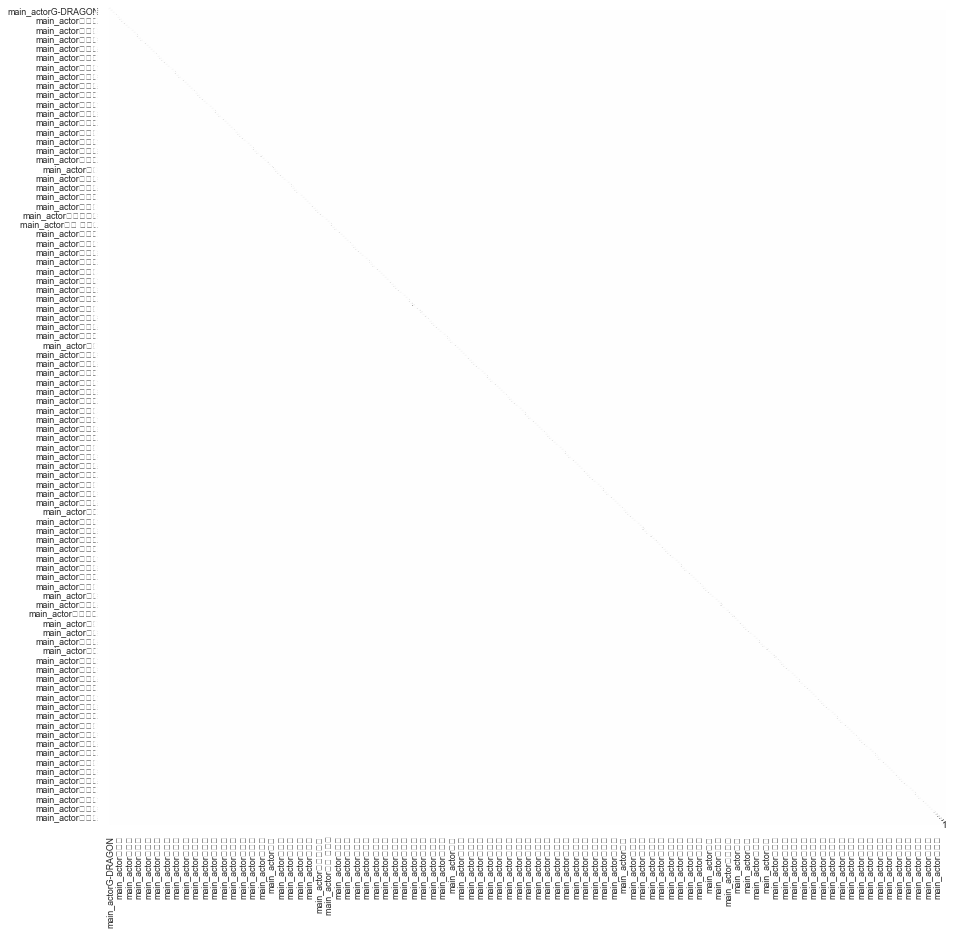

In [23]:
plt.figure(figsize=(15, 15))
sns.set(font_scale=0.8)
sns.heatmap(main_actor_corr, annot=True, cbar=False);
plt.show()

In [24]:
train = pd.concat([train.drop(columns=['main_actor']),
                   pd.DataFrame(train_act, columns=['main_actor' + col for col in ohe.categories_[0]])],axis=1)
train

,box_off_num,distributorBoXoo엔터테인먼트,distributorCJ,distributorJK필름,distributorKBS미디어,distributorKT,distributorKTG상상마당,distributorM2픽처스,distributorNEW,distributorOAL올,...,main_actor호효훈,main_actor홍서백,main_actor홍수아,main_actor홍아름,main_actor홍재희,main_actor홍종현,main_actor홍희용,main_actor환희,main_actor황정민,main_actor황정아
0,23398,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,7072501,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,6959083,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,217866,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,483387,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555,1958,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
556,1475091,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
557,1716438,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
558,2475,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
train_corr = train.corr(method='pearson')
train_corr

,box_off_num,distributorBoXoo엔터테인먼트,distributorCJ,distributorJK필름,distributorKBS미디어,distributorKT,distributorKTG상상마당,distributorM2픽처스,distributorNEW,distributorOAL올,...,main_actor호효훈,main_actor홍서백,main_actor홍수아,main_actor홍아름,main_actor홍재희,main_actor홍종현,main_actor홍희용,main_actor환희,main_actor황정민,main_actor황정아
box_off_num,1.000000,-0.038295,0.239941,0.000993,-0.015751,-0.001265,-0.042038,-0.015921,0.181390,-0.003697,...,-0.015888,-0.031917,-0.015924,-0.015887,-0.015840,-0.022404,-0.015926,-0.015932,0.241974,-0.015860
distributorBoXoo엔터테인먼트,-0.038295,1.000000,-0.035713,-0.004402,-0.004402,-0.004402,-0.011709,-0.004402,-0.026459,-0.004402,...,-0.004402,0.197136,-0.004402,-0.004402,-0.004402,-0.006230,-0.004402,-0.004402,-0.010830,-0.004402
distributorCJ,0.239941,-0.035713,1.000000,-0.014514,-0.014514,-0.014514,-0.038609,-0.014514,-0.087248,-0.014514,...,-0.014514,-0.029107,-0.014514,-0.014514,-0.014514,-0.020545,-0.014514,-0.014514,0.190268,-0.014514
distributorJK필름,0.000993,-0.004402,-0.014514,1.000000,-0.001789,-0.001789,-0.004759,-0.001789,-0.010753,-0.001789,...,-0.001789,-0.003587,-0.001789,-0.001789,-0.001789,-0.002532,-0.001789,-0.001789,-0.004402,-0.001789
distributorKBS미디어,-0.015751,-0.004402,-0.014514,-0.001789,1.000000,-0.001789,-0.004759,-0.001789,-0.010753,-0.001789,...,-0.001789,-0.003587,-0.001789,-0.001789,-0.001789,-0.002532,-0.001789,-0.001789,-0.004402,-0.001789
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
main_actor홍종현,-0.022404,-0.006230,-0.020545,-0.002532,-0.002532,-0.002532,-0.006736,-0.002532,-0.015221,-0.002532,...,-0.002532,-0.005078,-0.002532,-0.002532,-0.002532,1.000000,-0.002532,-0.002532,-0.006230,-0.002532
main_actor홍희용,-0.015926,-0.004402,-0.014514,-0.001789,-0.001789,-0.001789,-0.004759,-0.001789,-0.010753,-0.001789,...,-0.001789,-0.003587,-0.001789,-0.001789,-0.001789,-0.002532,1.000000,-0.001789,-0.004402,-0.001789
main_actor환희,-0.015932,-0.004402,-0.014514,-0.001789,-0.001789,-0.001789,-0.004759,-0.001789,-0.010753,-0.001789,...,-0.001789,-0.003587,-0.001789,-0.001789,-0.001789,-0.002532,-0.001789,1.000000,-0.004402,-0.001789
main_actor황정민,0.241974,-0.010830,0.190268,-0.004402,-0.004402,-0.004402,-0.011709,-0.004402,-0.026459,-0.004402,...,-0.004402,-0.008827,-0.004402,-0.004402,-0.004402,-0.006230,-0.004402,-0.004402,1.000000,-0.004402


In [26]:
train.describe(include='all')

,box_off_num,distributorBoXoo엔터테인먼트,distributorCJ,distributorJK필름,distributorKBS미디어,distributorKT,distributorKTG상상마당,distributorM2픽처스,distributorNEW,distributorOAL올,...,main_actor호효훈,main_actor홍서백,main_actor홍수아,main_actor홍아름,main_actor홍재희,main_actor홍종현,main_actor홍희용,main_actor환희,main_actor황정민,main_actor황정아
count,5.600000e+02,560.000000,560.000000,560.000000,560.000000,560.000000,560.000000,560.000000,560.000000,560.000000,...,560.000000,560.000000,560.000000,560.000000,560.000000,560.000000,560.000000,560.000000,560.000000,560.000000
mean,6.482782e+05,0.010714,0.105357,0.001786,0.001786,0.001786,0.012500,0.001786,0.060714,0.001786,...,0.001786,0.007143,0.001786,0.001786,0.001786,0.003571,0.001786,0.001786,0.010714,0.001786
std,1.720974e+06,0.103046,0.307288,0.042258,0.042258,0.042258,0.111202,0.042258,0.239019,0.042258,...,0.042258,0.084288,0.042258,0.042258,0.042258,0.059708,0.042258,0.042258,0.103046,0.042258
min,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.297250e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.215500e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.713228e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.426277e+07,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [27]:
train.shape

(560, 596)

In [28]:
df = pd.concat([train['box_off_num'],distributor,main_actor],axis=1)
df_corr = df.corr(method='pearson')
df_corr

,box_off_num,distributorBoXoo엔터테인먼트,distributorCJ,distributorJK필름,distributorKBS미디어,distributorKT,distributorKTG상상마당,distributorM2픽처스,distributorNEW,distributorOAL올,...,main_actor호효훈,main_actor홍서백,main_actor홍수아,main_actor홍아름,main_actor홍재희,main_actor홍종현,main_actor홍희용,main_actor환희,main_actor황정민,main_actor황정아
box_off_num,1.000000,-0.038295,0.239941,0.000993,-0.015751,-0.001265,-0.042038,-0.015921,0.181390,-0.003697,...,-0.015888,-0.031917,-0.015924,-0.015887,-0.015840,-0.022404,-0.015926,-0.015932,0.241974,-0.015860
distributorBoXoo엔터테인먼트,-0.038295,1.000000,-0.035713,-0.004402,-0.004402,-0.004402,-0.011709,-0.004402,-0.026459,-0.004402,...,-0.004402,0.197136,-0.004402,-0.004402,-0.004402,-0.006230,-0.004402,-0.004402,-0.010830,-0.004402
distributorCJ,0.239941,-0.035713,1.000000,-0.014514,-0.014514,-0.014514,-0.038609,-0.014514,-0.087248,-0.014514,...,-0.014514,-0.029107,-0.014514,-0.014514,-0.014514,-0.020545,-0.014514,-0.014514,0.190268,-0.014514
distributorJK필름,0.000993,-0.004402,-0.014514,1.000000,-0.001789,-0.001789,-0.004759,-0.001789,-0.010753,-0.001789,...,-0.001789,-0.003587,-0.001789,-0.001789,-0.001789,-0.002532,-0.001789,-0.001789,-0.004402,-0.001789
distributorKBS미디어,-0.015751,-0.004402,-0.014514,-0.001789,1.000000,-0.001789,-0.004759,-0.001789,-0.010753,-0.001789,...,-0.001789,-0.003587,-0.001789,-0.001789,-0.001789,-0.002532,-0.001789,-0.001789,-0.004402,-0.001789
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
main_actor홍종현,-0.022404,-0.006230,-0.020545,-0.002532,-0.002532,-0.002532,-0.006736,-0.002532,-0.015221,-0.002532,...,-0.002532,-0.005078,-0.002532,-0.002532,-0.002532,1.000000,-0.002532,-0.002532,-0.006230,-0.002532
main_actor홍희용,-0.015926,-0.004402,-0.014514,-0.001789,-0.001789,-0.001789,-0.004759,-0.001789,-0.010753,-0.001789,...,-0.001789,-0.003587,-0.001789,-0.001789,-0.001789,-0.002532,1.000000,-0.001789,-0.004402,-0.001789
main_actor환희,-0.015932,-0.004402,-0.014514,-0.001789,-0.001789,-0.001789,-0.004759,-0.001789,-0.010753,-0.001789,...,-0.001789,-0.003587,-0.001789,-0.001789,-0.001789,-0.002532,-0.001789,1.000000,-0.004402,-0.001789
main_actor황정민,0.241974,-0.010830,0.190268,-0.004402,-0.004402,-0.004402,-0.011709,-0.004402,-0.026459,-0.004402,...,-0.004402,-0.008827,-0.004402,-0.004402,-0.004402,-0.006230,-0.004402,-0.004402,1.000000,-0.004402


In [29]:
df1_corr = df_corr.drop(columns=df_corr.iloc[:,1:]).sort_values('box_off_num',ascending=False)
df2 = df1_corr.head(95).T
df2

,box_off_num,main_actor전지현,distributor쇼박스,main_actor송강호,main_actor황정민,distributorCJ,main_actor이병헌,main_actor크리스 에반스,main_actor심은경,distributorNEW,...,main_actor김서영,main_actor김선아,main_actor지현우,distributorSK,distributor싸이더스,main_actor달이,main_actor강지환,distributorJK필름,main_actor임창정,main_actor박민영
box_off_num,1.0,0.296618,0.296312,0.275123,0.241974,0.239941,0.226194,0.214058,0.197069,0.18139,...,0.002641,0.00204,0.002006,0.001804,0.001521,0.001183,0.001178,0.000993,0.000736,0.000592


In [30]:
plot_cols = df2.columns[1:]
plot_df = df2.loc[:, plot_cols]
plot_df

,main_actor전지현,distributor쇼박스,main_actor송강호,main_actor황정민,distributorCJ,main_actor이병헌,main_actor크리스 에반스,main_actor심은경,distributorNEW,main_actor류승룡,...,main_actor김서영,main_actor김선아,main_actor지현우,distributorSK,distributor싸이더스,main_actor달이,main_actor강지환,distributorJK필름,main_actor임창정,main_actor박민영
box_off_num,0.296618,0.296312,0.275123,0.241974,0.239941,0.226194,0.214058,0.197069,0.18139,0.170901,...,0.002641,0.00204,0.002006,0.001804,0.001521,0.001183,0.001178,0.000993,0.000736,0.000592


In [31]:
G = pd.read_csv('Main_actor_train.csv').drop(columns='Unnamed: 0',axis=1)
G = G[['box_off_num','title','distributor','genre','director','main_actor']]
G = G.drop(columns=['title','director'],axis=1)
G

,box_off_num,distributor,genre,main_actor
0,23398,롯데엔터테인먼트,액션,김무열
1,7072501,쇼박스,느와르,이병헌
2,6959083,쇼박스,액션,김수현
3,217866,NEW,코미디,윤제문
4,483387,쇼박스,코미디,임창정
...,...,...,...,...
595,1475091,NEW,드라마,김윤석
596,1716438,쇼박스,드라마,한석규
597,2475,마운틴픽처스,공포,김다현
598,2192525,CJ,느와르,손현주


In [42]:
G_dis = G.groupby('distributor')[['box_off_num']].count()
dis_sort = G_dis.sort_values('box_off_num',ascending=False).head(15)
dis_sort = dis_sort.reset_index(drop=False)
dis_sort
G_dum_dis = pd.get_dummies(G['distributor'])
G_dum_dis

,BoXoo엔터테인먼트,CJ,JK필름,KBS미디어,KT,KTG상상마당,M2픽처스,NEW,OAL올,SBS콘텐츠허브,...,프로젝트엠피,프리비젼엔터테인먼트,피터팬픽쳐스,필라멘트픽쳐스,필름라인,하준사,한국YWCA연합회,홀리가든,화앤담이엔티,휘엔터테인먼트
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
596,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
597,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
598,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [43]:
lst = []
for val in dis_sort['distributor']:
    lst.append(G[G['distributor']==val])
    
df_lst = pd.concat(lst)
df_lst

,box_off_num,distributor,genre,main_actor
14,92404,CJ,드라마,최수종
16,7453715,CJ,코미디,NaN
17,5693,CJ,드라마,서교
20,1624573,CJ,드라마,강동원
21,44074,CJ,드라마,이정현
...,...,...,...,...
333,9301,인디플러그,다큐멘터리,정태춘
391,1827,인디플러그,다큐멘터리,서동일
449,865,인디플러그,드라마,한희정
581,532,인디플러그,코미디,포돌이


In [44]:
df_lst = df_lst.dropna()
df_lst

,box_off_num,distributor,genre,main_actor
14,92404,CJ,드라마,최수종
17,5693,CJ,드라마,서교
20,1624573,CJ,드라마,강동원
21,44074,CJ,드라마,이정현
32,285084,CJ,애니메이션,멜라니 그리피스
...,...,...,...,...
333,9301,인디플러그,다큐멘터리,정태춘
391,1827,인디플러그,다큐멘터리,서동일
449,865,인디플러그,드라마,한희정
581,532,인디플러그,코미디,포돌이


In [45]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
DF1 = pd.DataFrame()

for items in df_lst.columns[1:]:
#     col = np.array(df_lst[items]).reshape(-1,1)
    encoder.fit(df_lst[items])
    DF1[items] = encoder.transform(df_lst[items])
DF1

,distributor,genre,main_actor
0,0,4,234
1,0,4,105
2,0,4,2
3,0,4,183
4,0,8,80
...,...,...,...
319,12,3,205
320,12,3,106
321,12,4,253
322,12,10,243


In [46]:
df_lst['box_off_num']

14       92404
17        5693
20     1624573
21       44074
32      285084
        ...   
333       9301
391       1827
449        865
581        532
585        938
Name: box_off_num, Length: 324, dtype: int64

In [47]:
DF1['box_off_num'] = df_lst['box_off_num'].values
DF1

,distributor,genre,main_actor,box_off_num
0,0,4,234,92404
1,0,4,105,5693
2,0,4,2,1624573
3,0,4,183,44074
4,0,8,80,285084
...,...,...,...,...
319,12,3,205,9301
320,12,3,106,1827
321,12,4,253,865
322,12,10,243,532


In [48]:
DF1.corr()

,distributor,genre,main_actor,box_off_num
distributor,1.000000,-0.111869,-0.072286,-0.291975
genre,-0.111869,1.000000,-0.066155,0.084950
main_actor,-0.072286,-0.066155,1.000000,0.066170
box_off_num,-0.291975,0.084950,0.066170,1.000000


In [49]:
G_dum_genre = pd.get_dummies(G['genre'])
G_dum_genre

,SF,공포,느와르,다큐멘터리,드라마,멜로/로맨스,뮤지컬,미스터리,서스펜스,애니메이션,액션,코미디
0,0,0,0,0,0,0,0,0,0,0,1,0
1,0,0,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
595,0,0,0,0,1,0,0,0,0,0,0,0
596,0,0,0,0,1,0,0,0,0,0,0,0
597,0,1,0,0,0,0,0,0,0,0,0,0
598,0,0,1,0,0,0,0,0,0,0,0,0


In [50]:
G_dum_act = pd.get_dummies(G['main_actor'])
G_dum_act

,G-DRAGON,T.O.P,강동원,강상희,강석우,강성민,강성필,강신성일,강신일,강신효,...,호효훈,홍서백,홍수아,홍아름,홍재희,홍종현,홍희용,환희,황정민,황정아
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
596,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
597,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
598,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [51]:
new=pd.concat([G_dum_dis,G_dum_genre,G_dum_act], axis=1)

In [52]:
plot_cols = G.columns[1:]

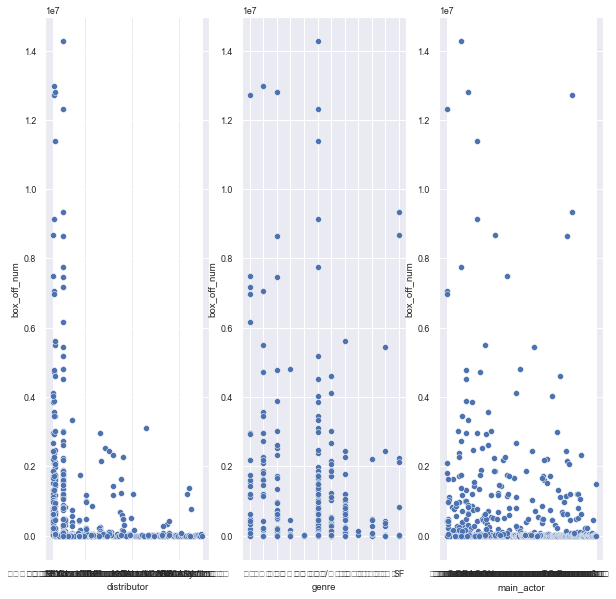

In [53]:
plt.figure(figsize=(10,10))

for idx, col in enumerate(plot_cols):
    ax1 = plt.subplot(1, 3, idx+1)
    sns.scatterplot(x=col, y='box_off_num', data=G, ax=ax1)    # y=plot_cols[0]
plt.show()

## 로지스틱

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

X = train.iloc[:,1:]
y = train['box_off_num']

X_train , X_test, y_train , y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [55]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [56]:
X_train.shape, X_test.shape

((392, 595), (168, 595))

In [57]:
y_train.shape, y_test.shape

((392,), (168,))

In [58]:
print('train data 개수: ', X_train.shape)
print('test data 개수: ', X_test.shape)

train data 개수:  (392, 595)
test data 개수:  (168, 595)


In [59]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train) 

LogisticRegression()

In [60]:
y_hat = lr.predict(X_test)

In [61]:
df_y = pd.DataFrame({'y':y_test,'y_hat':y_hat})
df_y

,y,y_hat
504,1383867,3223
408,4398,142609
66,654407,80734
338,63517,1141222
233,1831,4515833
...,...,...
293,11260,4586
56,514,426
144,1581,424778
60,484,402876


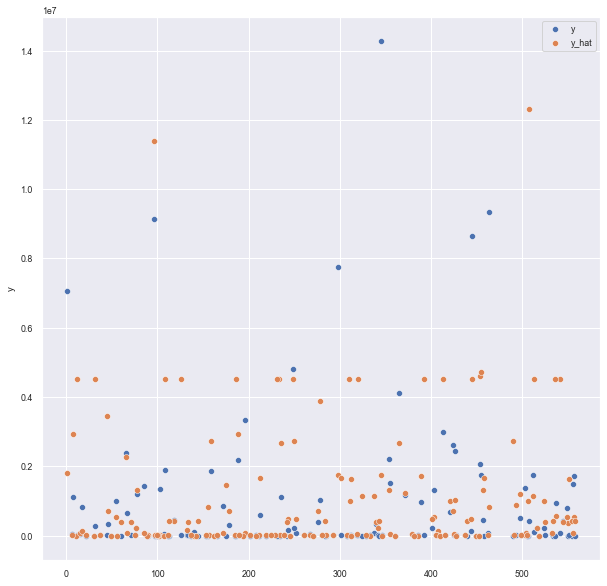

In [62]:
plt.figure(figsize=(10,10))
plot_cols = df_y.columns

for idx, col in enumerate(plot_cols):
    sns.scatterplot(x=df_y.index, y=col, data=df_y, label=col)
plt.show()

<AxesSubplot:ylabel='y'>

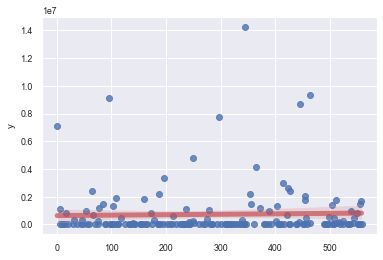

In [63]:
sns.regplot(x=df_y.index, y='y', data=df_y, line_kws={"color":"r","alpha":0.7,"lw":5})

<AxesSubplot:ylabel='y_hat'>

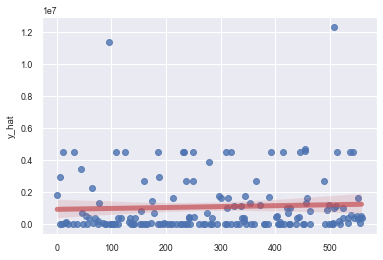

In [64]:
sns.regplot(x=df_y.index, y='y_hat', data=df_y, line_kws={"color":"r","alpha":0.7,"lw":5})

## L1 규제 (Lasso)

In [69]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error , r2_score

ls = Lasso(alpha = 100)
ls.fit(X_train ,y_train )
y_preds = ls.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)

print('평균제곱오차(MSE) : {0:.3f} , 평균 제곱근 오차(RMSE) : {1:.3F}'.format(mse , rmse))

평균제곱오차(MSE) : 27751184086994.043 , 평균 제곱근 오차(RMSE) : 5267939.264


In [71]:
from sklearn.model_selection import cross_val_score

In [72]:
alphas = [100, 10, 1, 0.1, 0.01, 0.001, 0.0001]

for alpha in alphas :
    lasso = Lasso(alpha = alpha)
    
    neg_mse_scores = cross_val_score(lasso, X_train, y_train, scoring="neg_mean_squared_error", cv = 5)
    avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
    print('alpha {0} 일 때 5 folds 의 평균 RMSE : {1:.3f} '.format(alpha,avg_rmse))

alpha 100 일 때 5 folds 의 평균 RMSE : 4694016.823 
alpha 10 일 때 5 folds 의 평균 RMSE : 4761640.902 
alpha 1 일 때 5 folds 의 평균 RMSE : 4777134.474 
alpha 0.1 일 때 5 folds 의 평균 RMSE : 4778785.843 
alpha 0.01 일 때 5 folds 의 평균 RMSE : 4778951.527 
alpha 0.001 일 때 5 folds 의 평균 RMSE : 4778968.115 
alpha 0.0001 일 때 5 folds 의 평균 RMSE : 4778969.774 


<AxesSubplot:ylabel='y'>

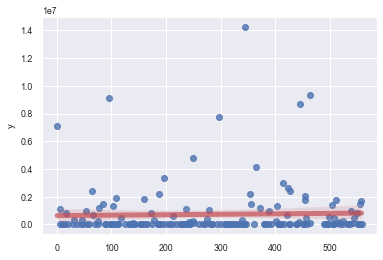

In [73]:
df_y = pd.DataFrame({'y':y_test,'y_hat':y_preds})
sns.regplot(x=df_y.index, y='y', data=df_y, line_kws={"color":"r","alpha":0.7,"lw":5})

<AxesSubplot:ylabel='y_hat'>

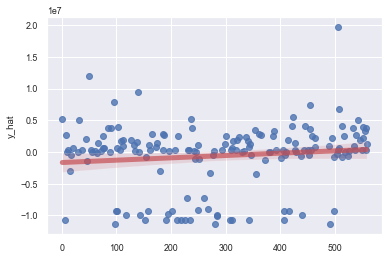

In [74]:
sns.regplot(x=df_y.index, y='y_hat', data=df_y, line_kws={"color":"r","alpha":0.7,"lw":5})

## L2 규제 (Ridge)

In [75]:
import numpy as np
from sklearn.model_selection import train_test_split
import pandas as pd

from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

ridge = Ridge(alpha = 100)

ridge = Ridge(alpha = alpha)
ridge.fit(X_train ,y_train )

neg_mse_scores = cross_val_score(ridge, X_train, y_train, scoring="neg_mean_squared_error", cv = 5)
rmse_scores  = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)
print(' 5 folds 의 개별 Negative MSE scores: ', np.round(neg_mse_scores, 3))
print(' 5 folds 의 개별 RMSE scores : ', np.round(rmse_scores,3))
print(' 5 folds 의 평균 RMSE : {0:.3f} '.format(avg_rmse))

 5 folds 의 개별 Negative MSE scores:  [-2.65395168e+13 -1.97978161e+13 -1.29505448e+13 -4.14923963e+13
 -1.06004852e+13]
 5 folds 의 개별 RMSE scores :  [5151651.853 4449473.689 3598686.542 6441459.175 3255838.629]
 5 folds 의 평균 RMSE : 4579421.978 


In [76]:
alphas = [100, 10, 1, 0.1, 0.01, 0.001, 0.0001]

for alpha in alphas :
    ridge = Ridge(alpha = alpha)
    
    neg_mse_scores = cross_val_score(ridge, X_train, y_train, scoring="neg_mean_squared_error", cv = 5)
    avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
    print('alpha {0} 일 때 5 folds 의 평균 RMSE : {1:.3f} '.format(alpha,avg_rmse))

alpha 100 일 때 5 folds 의 평균 RMSE : 1585913.304 
alpha 10 일 때 5 folds 의 평균 RMSE : 2004855.121 
alpha 1 일 때 5 folds 의 평균 RMSE : 3224246.737 
alpha 0.1 일 때 5 folds 의 평균 RMSE : 4338844.573 
alpha 0.01 일 때 5 folds 의 평균 RMSE : 4553494.517 
alpha 0.001 일 때 5 folds 의 평균 RMSE : 4577043.974 
alpha 0.0001 일 때 5 folds 의 평균 RMSE : 4579421.978 


<AxesSubplot:ylabel='y'>

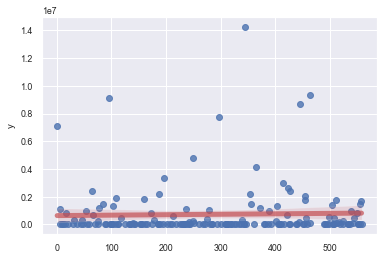

In [77]:
df_y = pd.DataFrame({'y':y_test,'y_hat':y_preds})
sns.regplot(x=df_y.index, y='y', data=df_y, line_kws={"color":"r","alpha":0.7,"lw":5})

<AxesSubplot:ylabel='y_hat'>

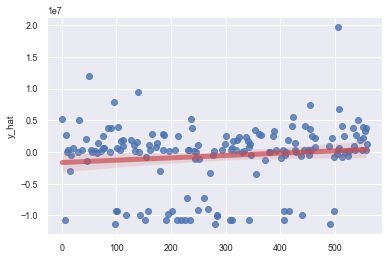

In [78]:
sns.regplot(x=df_y.index, y='y_hat', data=df_y, line_kws={"color":"r","alpha":0.7,"lw":5})

## 엘라스틱넷

In [79]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import cross_val_score

elastic = ElasticNet(alpha = alpha, l1_ratio = 0.7)
elastic.fit(X_train ,y_train )

neg_mse_scores = cross_val_score(elastic,X_train ,y_train, scoring="neg_mean_squared_error", cv = 5)
rmse_scores  = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)
print(' 5 folds 의 개별 Negative MSE scores: ', np.round(neg_mse_scores, 3))
print(' 5 folds 의 개별 RMSE scores : ', np.round(rmse_scores,3))
print(' 5 folds 의 평균 RMSE : {0:.3f} '.format(avg_rmse))

 5 folds 의 개별 Negative MSE scores:  [-2.99065955e+13 -2.22482454e+13 -1.28509666e+13 -4.30254436e+13
 -1.14324726e+13]
 5 folds 의 개별 RMSE scores :  [5468692.302 4716804.572 3584824.487 6559378.297 3381193.963]
 5 folds 의 평균 RMSE : 4742178.724 


In [80]:
elastic_alphas = [0.07, 0.1, 0.5, 1, 3]

for alpha in elastic_alphas :
    elastic = ElasticNet(alpha = alpha, l1_ratio = 0.7)

    neg_mse_scores =  cross_val_score(elastic,X_train ,y_train, scoring="neg_mean_squared_error", cv = 5)
    avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
    print('alpha {0} 일 때 5 folds 의 평균 RMSE : {1:.3f} '.format(alpha,avg_rmse))

alpha 0.07 일 때 5 folds 의 평균 RMSE : 2137562.568 
alpha 0.1 일 때 5 folds 의 평균 RMSE : 2022243.678 
alpha 0.5 일 때 5 folds 의 평균 RMSE : 1688458.274 
alpha 1 일 때 5 folds 의 평균 RMSE : 1593095.091 
alpha 3 일 때 5 folds 의 평균 RMSE : 1498741.822 


<AxesSubplot:ylabel='y'>

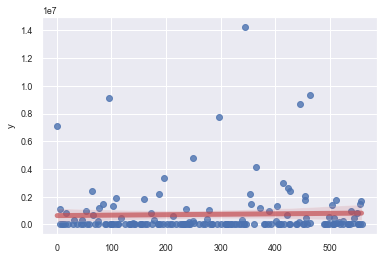

In [81]:
df_y = pd.DataFrame({'y':y_test,'y_hat':y_preds})
sns.regplot(x=df_y.index, y='y', data=df_y, line_kws={"color":"r","alpha":0.7,"lw":5})

<AxesSubplot:ylabel='y_hat'>

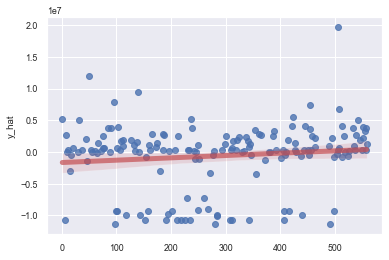

In [82]:
sns.regplot(x=df_y.index, y='y_hat', data=df_y, line_kws={"color":"r","alpha":0.7,"lw":5})